## Fraud Detection System for Motor Insurance Claims

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the validity of claims on vehicle insurance is influenced by other variables such as Vehicle Model, Make, Year, Amount Claim, Incident Type, Colision Type,Incident City Driver Age, Gender, Witness present, Police Report file,Incident severity, Hour of the day and No of Vehincle involved.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/patilk1/fraudulentinsuranceclaim
- The data consists of 11 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv(r"C:\Users\FOLASADE\Downloads\fraud_insurance_claims.csv") 

#### Show Top 5 Records

In [3]:
df.head()

,age,gender,incident_type,collision_type,incident_severity,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,police_report_available,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,46,FEMALE,Parked Car,Unknown,Minor Damage,Northbrook,5,1,2,UNKNOWN,1440,Toyota,Corolla,2004,0
1,43,MALE,Parked Car,Unknown,Minor Damage,Northbend,0,1,3,YES,1440,Chevrolet,Tahoe,2011,0
2,39,MALE,Parked Car,Unknown,Minor Damage,Northbend,5,1,1,YES,1680,Ford,F150,2009,0
3,57,MALE,Parked Car,Unknown,Minor Damage,Springfield,3,1,3,UNKNOWN,1680,Volkswagen,Passat,2000,0
4,33,MALE,Vehicle Theft,Unknown,Minor Damage,Arlington,3,1,1,NO,1750,Toyota,Corolla,2005,0


#### Shape of the dataset

In [4]:
df.shape

(1000, 15)

### 2.2 Dataset information
- age	
- gender : (Male/female)	
- incident_type	
- collision_type	
- incident_severity	
- incident_city	
- incident_hour_of_the_day	
- number_of_vehicles_involved	
- witnesses	
- police_report_available	
- vehicle_claim	
- auto_make	
- auto_model	
- auto_year	
- fraud_reported

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

age                            0
gender                         0
incident_type                  0
collision_type                 0
incident_severity              0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
witnesses                      0
police_report_available        0
vehicle_claim                  0
auto_make                      0
auto_model                     0
auto_year                      0
fraud_reported                 0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [4]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   incident_type                1000 non-null   object
 2   collision_type               1000 non-null   object
 3   incident_severity            1000 non-null   object
 4   incident_city                1000 non-null   object
 5   incident_hour_of_the_day     1000 non-null   object
 6   police_report_available      1000 non-null   object
 7   auto_make                    1000 non-null   object
 8   auto_model                   1000 non-null   object
 9   auto_year                    1000 non-null   object
 10  age                          1000 non-null   int64 
 11  number_of_vehicles_involved  1000 non-null   int64 
 12  witnesses                    1000 non-null   int64 
 13  vehicle_claim                1000 

### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

age                             46
gender                           2
incident_type                    4
collision_type                   4
incident_severity                4
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
witnesses                        4
police_report_available          3
vehicle_claim                  726
auto_make                       14
auto_model                      39
auto_year                       21
fraud_reported                   2
dtype: int64

### 3.5 Check statistics of data set

In [9]:
df.describe()

,age,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,vehicle_claim,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38.948000,11.644000,1.83900,1.487000,37930.880000,2005.103000,0.247000
std,9.140287,6.951373,1.01888,1.111335,18882.478424,6.015861,0.431483
min,19.000000,0.000000,1.00000,0.000000,1440.000000,1995.000000,0.000000
25%,32.000000,6.000000,1.00000,1.000000,30292.500000,2000.000000,0.000000
50%,38.000000,12.000000,1.00000,1.000000,42100.000000,2005.000000,0.000000
75%,44.000000,17.000000,3.00000,2.000000,50822.500000,2010.000000,0.000000
max,64.000000,23.000000,4.00000,3.000000,79560.000000,2015.000000,1.000000


#### Insight
- From above description of numerical data, there seem to be potential correlations between variables such as age and the likelihood of fraud being reported, as well as the number of vehicles involved and the amount of the vehicle claim.
- There might be a correlation between the age of the individual involved in the incident and the severity of the incident. For example, younger drivers might be more prone to accidents due to lack of experience or risk-taking behavior, resulting in a higher incident severity.

### 3.7 Exploring Data

In [10]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in'incident_type' variable:",end=" " )
print(df['incident_type'].unique())

print("Categories in 'collision_type' variable:     ",end=" " )
print(df['collision_type'].unique())

print("Categories in 'incident_severity' variable:     ",end=" " )
print(df['incident_severity'].unique())

print("Categories in 'incident_city' variable:     ",end=" " )
print(df['incident_city'].unique())

print("Categories in 'incident_hour_of_the_day' variable:     ",end=" " )
print(df['incident_hour_of_the_day'].unique())

print("Categories in 'number_of_vehicles_involved' variable:     ",end=" " )
print(df['number_of_vehicles_involved'].unique())

print("Categories in 'witnesses' variable:     ",end=" " )
print(df['witnesses'].unique())

print("Categories in 'police_report_available' variable:     ",end=" " )
print(df['police_report_available'].unique())

print("Categories in 'auto_make' variable:     ",end=" " )
print(df['auto_make'].unique())

print("Categories in 'auto_model' variable:     ",end=" " )
print(df['auto_model'].unique())

print("Categories in 'auto_year' variable:     ",end=" " )
print(df['auto_year'].unique())

Categories in 'gender' variable:      ['FEMALE' 'MALE']
Categories in'incident_type' variable: ['Parked Car' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Single Vehicle Collision']
Categories in 'collision_type' variable:      ['Unknown' 'Rear Collision' 'Front Collision' 'Side Collision']
Categories in 'incident_severity' variable:      ['Minor Damage' 'Trivial Damage' 'Total Loss' 'Major Damage']
Categories in 'incident_city' variable:      ['Northbrook' 'Northbend' 'Springfield' 'Arlington' 'Riverwood' 'Columbus'
 'Hillsdale']
Categories in 'incident_hour_of_the_day' variable:      [ 5  0  3 22 19  7  9  6  4  8 21 13 20 16 17 10  1 14 23  2 12 18 15 11]
Categories in 'number_of_vehicles_involved' variable:      [1 3 4 2]
Categories in 'witnesses' variable:      [2 3 1 0]
Categories in 'police_report_available' variable:      ['UNKNOWN' 'YES' 'NO']
Categories in 'auto_make' variable:      ['Toyota' 'Chevrolet' 'Ford' 'Volkswagen' 'Honda' 'BMW' 'Nissan' 'Jeep'
 'Audi' 'Suburu' 'Saab' 

In [11]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['age', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'witnesses', 'vehicle_claim', 'auto_year', 'fraud_reported']

We have 8 categorical features : ['gender', 'incident_type', 'collision_type', 'incident_severity', 'incident_city', 'police_report_available', 'auto_make', 'auto_model']


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize vehicle claims distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

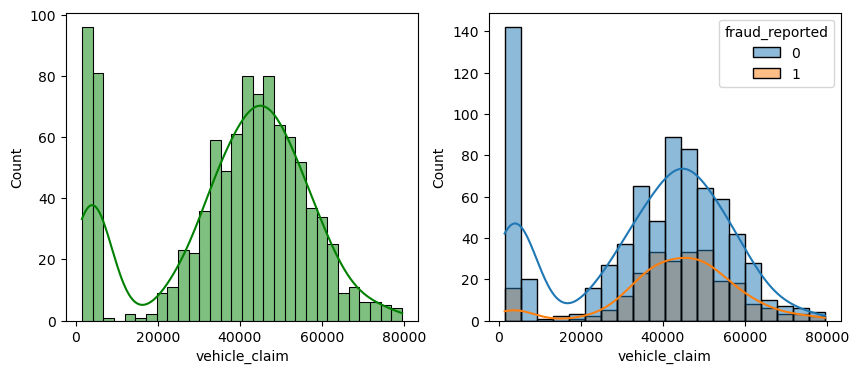

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.subplot(121)
sns.histplot(data=df,x='vehicle_claim',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='vehicle_claim',kde=True,hue='fraud_reported')
plt.show()

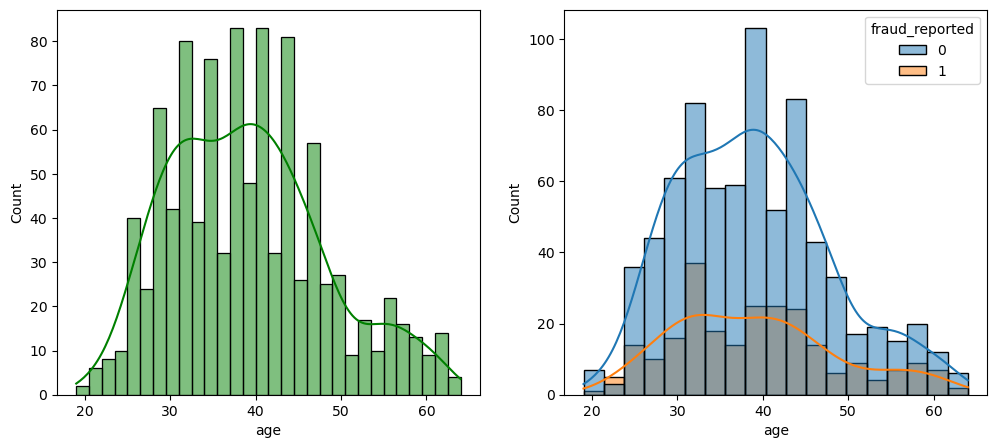

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plt.subplot(121)
sns.histplot(data=df,x='age',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='age',kde=True,hue='fraud_reported')
plt.show()

#####  Insights
- Age 30 - 40 has the highest fraud claims.
- Most fraudulent claims are from £30,000 to £60,000 and less than £10,000 on average.

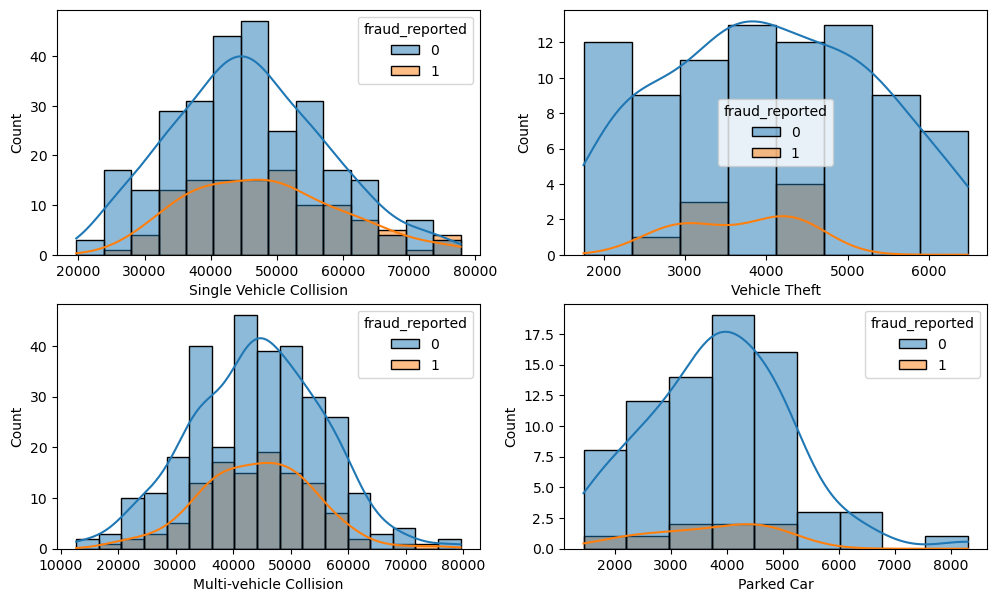

In [14]:
plt.subplots(2, 2, figsize=(12, 7))


plt.subplot(221)
sns.histplot(data=df[df.incident_type=='Single Vehicle Collision'], x='vehicle_claim', kde=True, hue='fraud_reported')
plt.xlabel('Single Vehicle Collision')
plt.subplot(222)
sns.histplot(data=df[df.incident_type=='Vehicle Theft'], x='vehicle_claim', kde=True, hue='fraud_reported')
plt.xlabel('Vehicle Theft')
plt.subplot(223)
sns.histplot(data=df[df.incident_type=='Multi-vehicle Collision'], x='vehicle_claim', kde=True, hue='fraud_reported')
plt.xlabel('Multi-vehicle Collision')
plt.subplot(224)
sns.histplot(data=df[df.incident_type=='Parked Car'], x='vehicle_claim', kde=True, hue='fraud_reported')
plt.xlabel('Parked Car')
plt.show()

#####  Insights
- Single car collision and vehicle theft have the highest fraud claims.
- Most fraud claims for Parked Cars are about £5,000 and lower.

#### 4.2 Distribution of Claims and Age

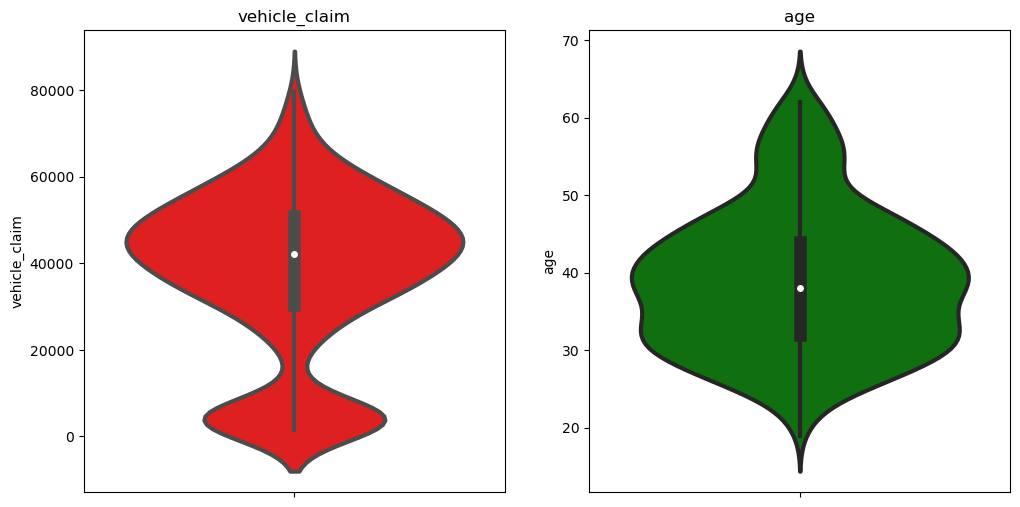

In [15]:
plt.figure(figsize=(25,6))
plt.subplot(1, 4, 1)
plt.title('vehicle_claim')
sns.violinplot(y='vehicle_claim',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('age')
sns.violinplot(y='age',data=df,color='green',linewidth=3)
plt.show()

#### Insights
- From the above two plots its clearly visible that most claims are mostly around £40,000 to £60,000 and Age of vehicle insurer are 30 to 40 mostly.

#### 4.3 Multivariate analysis using pieplot

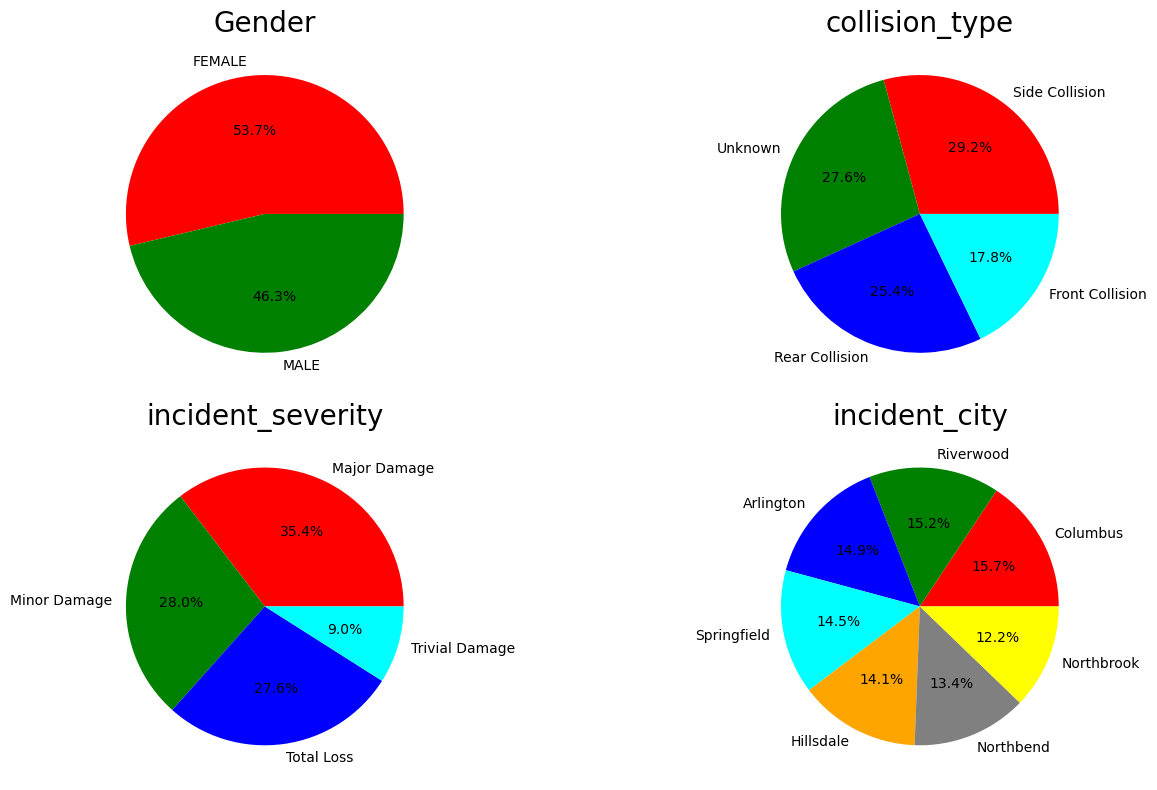

In [16]:
plt.rcParams['figure.figsize'] = (14, 8)


plt.subplot(2, 2, 1)
size = df['gender'].value_counts()
labels = 'FEMALE', 'MALE'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '%.1f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(2, 2, 2)
size = df['collision_type'].value_counts()
labels = 'Side Collision', 'Unknown', 'Rear Collision', 'Front Collision'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%.1f%%')
plt.title('collision_type', fontsize = 20)
plt.axis('off')



plt.subplot(2, 2, 3)
size = df['incident_severity'].value_counts()
labels = 'Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'
color = ['red','green','blue', 'cyan']

plt.pie(size, colors = color,labels = labels,autopct = '%.1f%%')
plt.title('incident_severity', fontsize = 20)
plt.axis('off')


plt.subplot(2, 2, 4)
size = df['incident_city'].value_counts()
labels =  'Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale', 'Northbend', 'Northbrook'
color = ['red', 'green', 'blue', 'cyan','orange','grey','yellow']

plt.pie(size, colors = color,labels = labels,autopct = '%.1f%%')
plt.title('incident_city', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female is almost equal
- Distribution of incident occurence in each city are almost the same
- Major Damage is more than 1/3 of the entire incident severity
- Collision type are not equally distributed

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on fraudulent claims ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

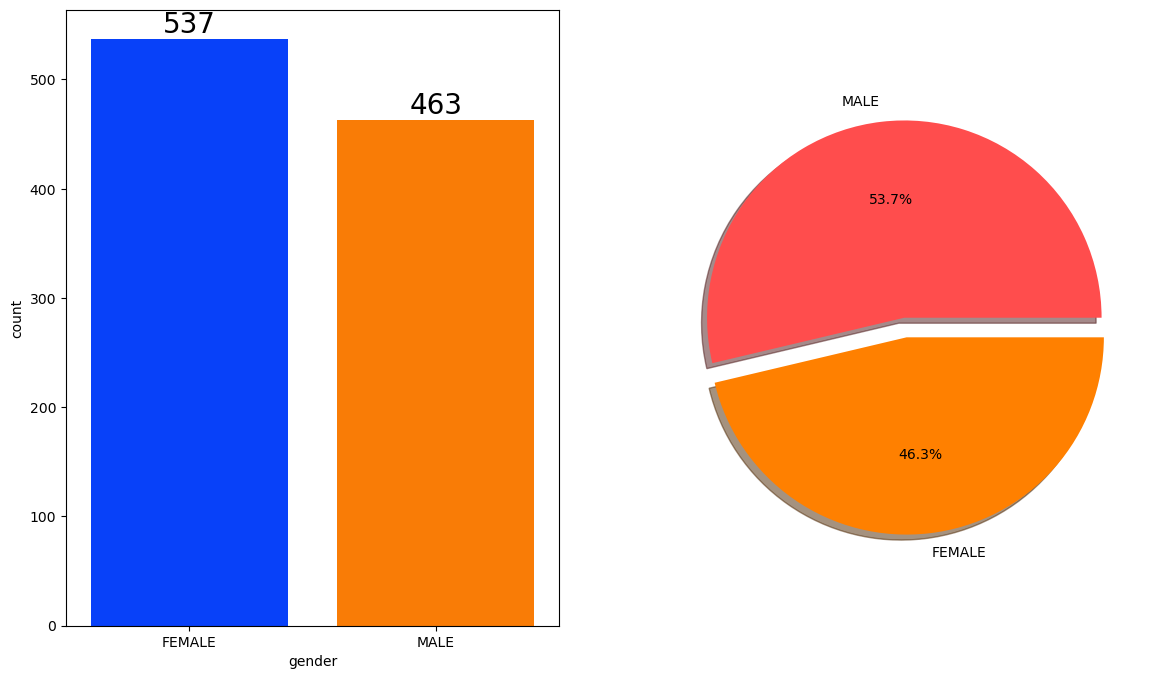

In [17]:
f,ax=plt.subplots(1,2,figsize=(14,8))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['MALE','FEMALE'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female  are 537 (46%) and male are 463 (54%) 

#### 4.4.1INCIDENT TYPE COLUMN
- How is Group wise distribution ?
- Is Age has any impact on fraud claims ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

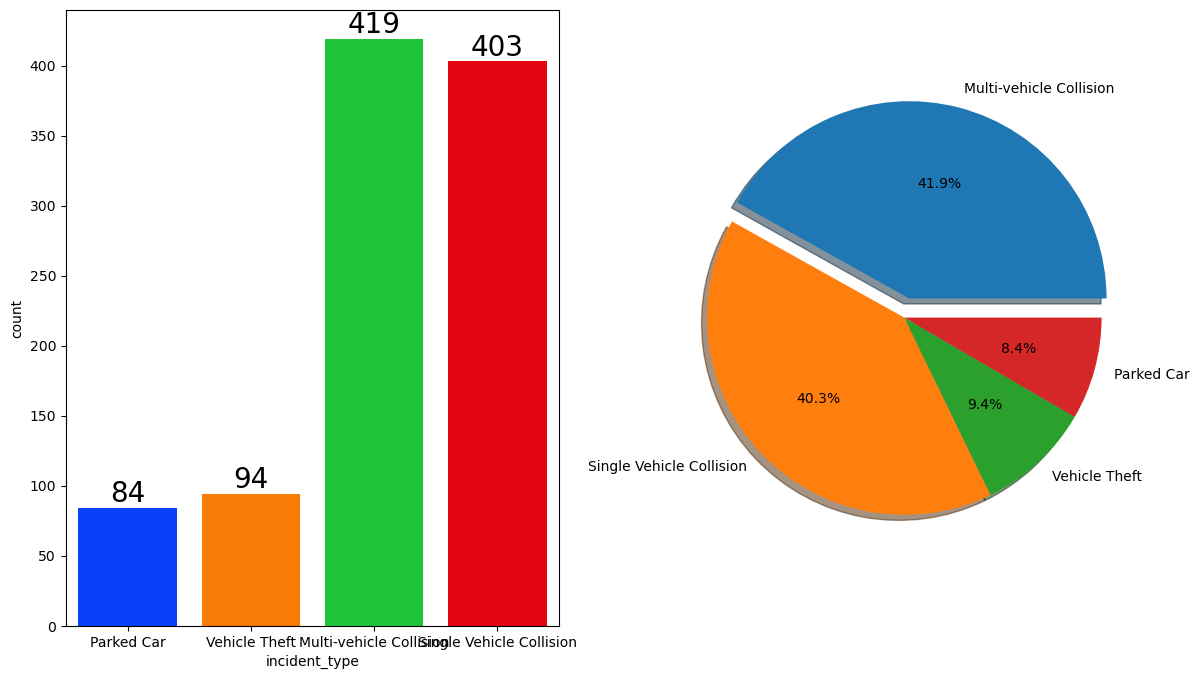

In [18]:
f,ax=plt.subplots(1,2,figsize=(14,8))
sns.countplot(x=df['incident_type'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['incident_type'].value_counts(),labels=df['incident_type'].value_counts().index,explode=[0.1,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the claims are either singe or multi vehicle collision
- Parked Car has the lowest partition

#### 4.4.6 CHECKING OUTLIERS

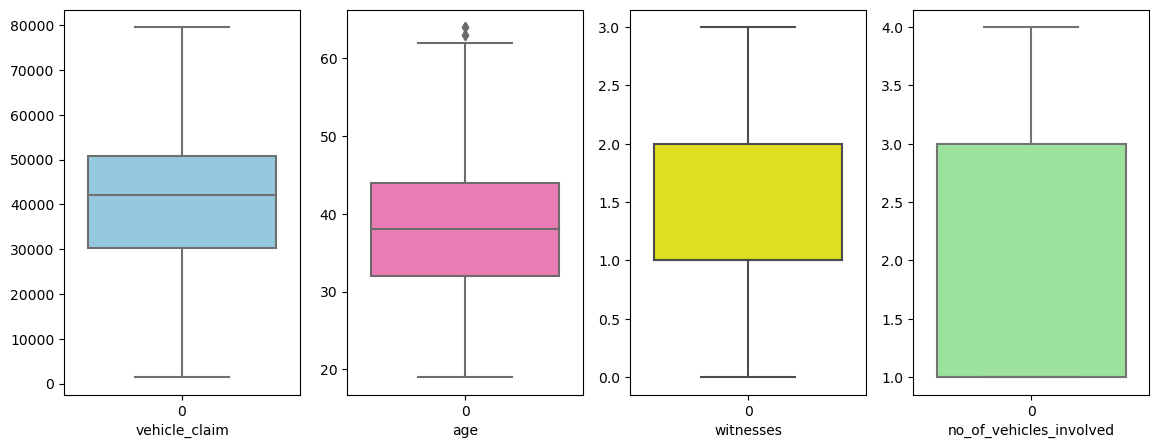

In [19]:
plt.subplots(1,4,figsize=(14,5))
plt.subplot(141)
sns.boxplot(df['vehicle_claim'],color='skyblue')
plt.xlabel('vehicle_claim')
plt.subplot(142)
sns.boxplot(df['age'],color='hotpink')
plt.xlabel('age')
plt.subplot(143)
sns.boxplot(df['witnesses'],color='yellow')
plt.xlabel('witnesses')
plt.subplot(144)
sns.boxplot(df['number_of_vehicles_involved'],color='lightgreen')
plt.xlabel('no_of_vehicles_involved')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

<Figure size 1200x1000 with 0 Axes>

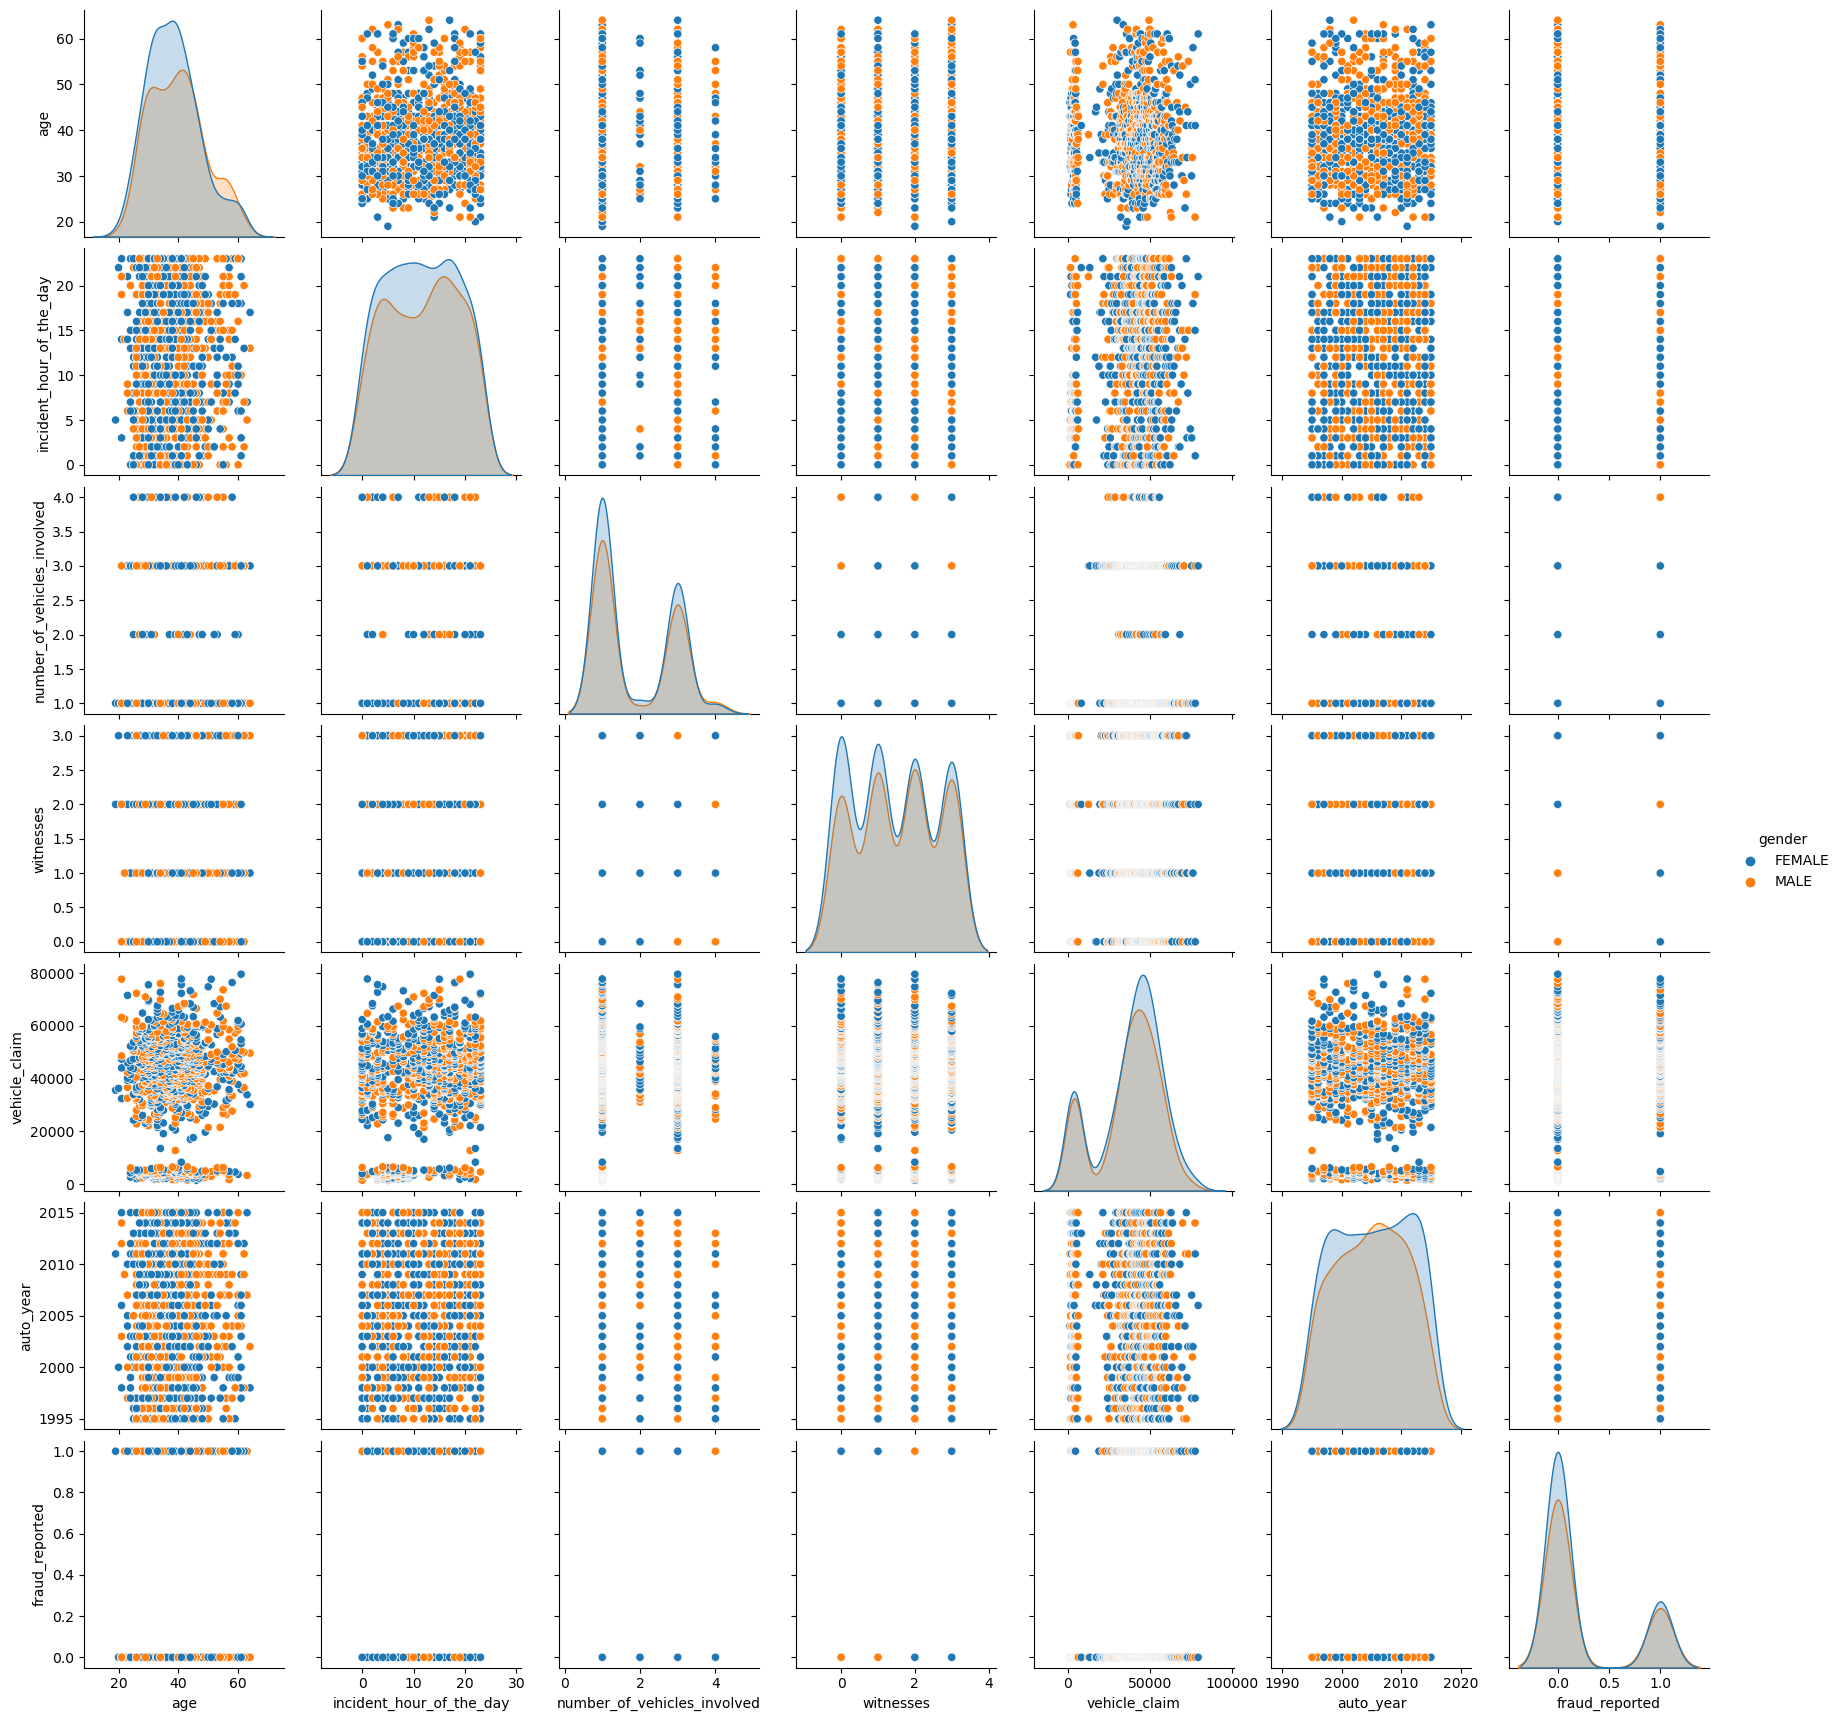

In [20]:
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='gender')
plt.show()

#### Insights
- From the above plot it is clear that gender is equally distributed mostly across all features.

### 5. Conclusions
- Fraud claims are mostly from 30,000 to 50,000.
- Age 40 to 60 has the highest distribution in fraudulant claims. 
- Gender are well distributed across all columns.
- Single and multi vehicle collision has the highest partition of claims.